<a href="https://colab.research.google.com/github/dribnet/pixray_notebooks/blob/master/pixray_minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# gpu check
nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  print(f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, some things might not work <--")
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

# install
print("Installing...")
from IPython.utils import io
with io.capture_output() as captured:
  !rm -Rf pixray
  !git clone https://github.com/pixray/pixray
  !pip install -r pixray/requirements.txt
  !rm -Rf v-diffusion-pytorch
  !git clone https://github.com/pixray/v-diffusion-pytorch
  # not sure why this setup hack is necessary
  !cp -r v-diffusion-pytorch/diffusion pixray/.
  !pip uninstall -y tensorflow 
  !git clone https://github.com/pixray/diffvg
  %cd diffvg
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  !pip freeze | grep torch

# remind restart runtime
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  print("Please choose Runtime -> Restart Runtime from the menu")
  print("(then continue below)")
else:
  print("Setup Complete! Good luck with your drawing")


GPU check: 16280 MiB available: this should be fine
Installing...
Setup Complete! Good luck with your drawing


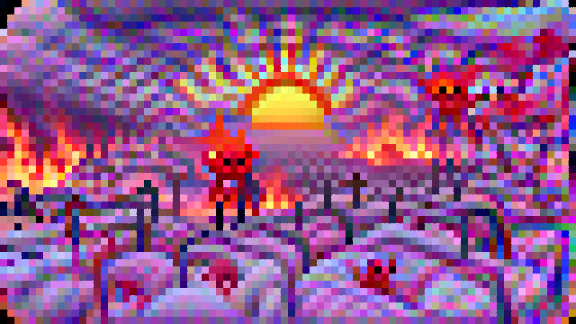

iter: 300, finished (-16=>2.421)



True

In [2]:
import sys
sys.path.append("pixray")
# Simple setup
import pixray

prompts = "a beautiful sunrise in hell"
drawer = "pixel"

# these are good settings for pixeldraw
pixray.reset_settings()
pixray.add_settings(prompts=prompts)
pixray.add_settings(quality="better")
pixray.add_settings(drawer=drawer)
pixray.add_settings(display_clear=True)
settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)